# Importing the required libraries

In [1]:
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pickle

#Data Loading and Pre-processing

<ipython-input-3-02b132ea98e6>:24: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),


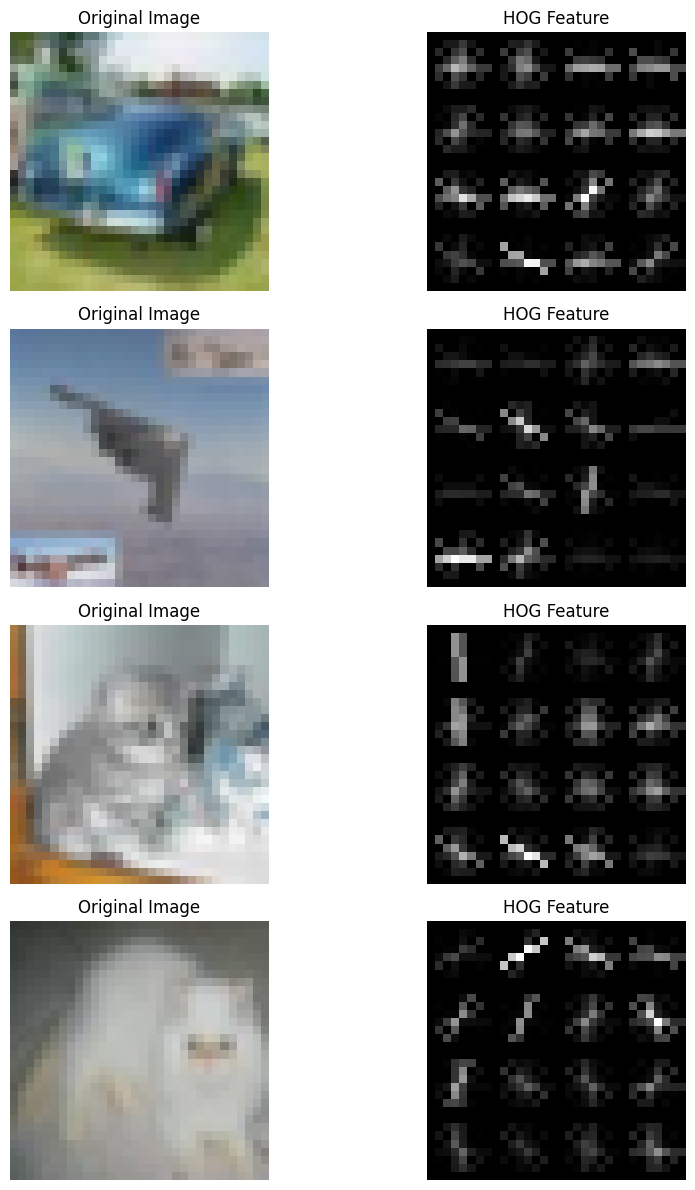

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = y_train.ravel()
y_test = y_test.ravel()
# Flatten images
x_train_flat = x_train.reshape(-1, 32 * 32 * 3)
x_test_flat = x_test.reshape(-1, 32 * 32 * 3)
# Visualising Hog Feature Extractor
num_images = 4
random_indices = np.random.choice(len(x_train), num_images, replace=False)
selected_images = x_train[random_indices]

# Plot original images and their HOG representations
fig, axes = plt.subplots(num_images, 2, figsize=(10, 12))

for i, image in enumerate(selected_images):
    # Original image
    axes[i, 0].imshow(image, interpolation='nearest')  # Set interpolation to 'nearest'
    axes[i, 0].axis('off')
    axes[i, 0].set_title("Original Image")

    # Compute HOG features
    hog_features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                                   cells_per_block=(2, 2), visualize=True, multichannel=True)

    # HOG feature representation
    axes[i, 1].imshow(hog_image, cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title("HOG Feature")

plt.tight_layout()
plt.show()

#Implementing Hog Feature Descriptor

In [4]:
# HOG Feature extraction
hog_features_train = []
hog_features_test = []
for img in x_train_flat:
    hog_features_train.append(hog(img.reshape((32, 32, 3)), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), channel_axis=-1))
for img in x_test_flat:
    hog_features_test.append(hog(img.reshape((32, 32, 3)), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), channel_axis=-1))


In [5]:
hog_features_train = np.array(hog_features_train)
hog_features_test = np.array(hog_features_test)

# Split data into train and validation sets
x_train_hog, x_val_hog, y_train_hog, y_val_hog = train_test_split(hog_features_train, y_train, test_size=0.2, random_state=25)


#knn model

In [6]:
# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_hog, y_train_hog)
knn_predictions = knn_classifier.predict(x_val_hog)
knn_accuracy = accuracy_score(y_val_hog, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
# Calculate evaluation metrics
report = classification_report(y_val_hog, knn_predictions, target_names=["Class "+str(i) for i in range(10)])

# Print evaluation metrics
print("Evaluation Metrics for KNN Classifier:")
print(report)

KNN Accuracy: 0.5032
Evaluation Metrics for KNN Classifier:
              precision    recall  f1-score   support

     Class 0       0.66      0.53      0.59       961
     Class 1       0.65      0.72      0.68       966
     Class 2       0.43      0.40      0.41      1017
     Class 3       0.40      0.17      0.24       975
     Class 4       0.31      0.60      0.41       993
     Class 5       0.50      0.27      0.35      1031
     Class 6       0.39      0.77      0.52       991
     Class 7       0.71      0.46      0.56      1029
     Class 8       0.68      0.54      0.60       994
     Class 9       0.70      0.57      0.63      1043

    accuracy                           0.50     10000
   macro avg       0.54      0.50      0.50     10000
weighted avg       0.54      0.50      0.50     10000



In [7]:
# KNN Testing Accuracy
knn_test_predictions = knn_classifier.predict(hog_features_test)
knn_test_accuracy = accuracy_score(y_test, knn_test_predictions)
print("KNN Testing Accuracy:", knn_test_accuracy)

KNN Testing Accuracy: 0.5086


#Decision Trees

In [8]:
# Decision Trees
dt_classifier = DecisionTreeClassifier(random_state=25)
dt_classifier.fit(x_train_hog, y_train_hog)
dt_predictions = dt_classifier.predict(x_val_hog)
dt_accuracy = accuracy_score(y_val_hog, dt_predictions)
print("Decision Trees Accuracy:", dt_accuracy)
# Calculate evaluation metrics
report = classification_report(y_val_hog, dt_predictions, target_names=["Class "+str(i) for i in range(10)])

# Print evaluation metrics
print("Evaluation Metrics for Decision Trees Classifier:")
print(report)


Decision Trees Accuracy: 0.2735
Evaluation Metrics for Decision Trees Classifier:
              precision    recall  f1-score   support

     Class 0       0.38      0.38      0.38       961
     Class 1       0.36      0.37      0.37       966
     Class 2       0.20      0.20      0.20      1017
     Class 3       0.19      0.19      0.19       975
     Class 4       0.19      0.20      0.19       993
     Class 5       0.23      0.22      0.23      1031
     Class 6       0.30      0.31      0.31       991
     Class 7       0.28      0.25      0.27      1029
     Class 8       0.34      0.34      0.34       994
     Class 9       0.28      0.28      0.28      1043

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



In [9]:
# Decision Trees Testing Accuracy
dt_test_predictions = dt_classifier.predict(hog_features_test)
dt_test_accuracy = accuracy_score(y_test, dt_test_predictions)
print("Decision Trees Testing Accuracy:", dt_test_accuracy)

Decision Trees Testing Accuracy: 0.273


#Random Forests

In [10]:
# Random Forests
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=25)
rf_classifier.fit(x_train_hog, y_train_hog)
rf_predictions = rf_classifier.predict(x_val_hog)
rf_accuracy = accuracy_score(y_val_hog, rf_predictions)
print("Random Forests Accuracy:", rf_accuracy)
# Calculate evaluation metrics
report = classification_report(y_val_hog, rf_predictions, target_names=["Class "+str(i) for i in range(10)])

# Print evaluation metrics
print("Evaluation Metrics for Decision Trees Classifier:")
print(report)

Random Forests Accuracy: 0.5152
Evaluation Metrics for Decision Trees Classifier:
              precision    recall  f1-score   support

     Class 0       0.60      0.60      0.60       961
     Class 1       0.56      0.70      0.63       966
     Class 2       0.43      0.35      0.39      1017
     Class 3       0.35      0.26      0.30       975
     Class 4       0.42      0.45      0.44       993
     Class 5       0.42      0.46      0.44      1031
     Class 6       0.53      0.66      0.59       991
     Class 7       0.58      0.52      0.55      1029
     Class 8       0.59      0.57      0.58       994
     Class 9       0.62      0.58      0.60      1043

    accuracy                           0.52     10000
   macro avg       0.51      0.52      0.51     10000
weighted avg       0.51      0.52      0.51     10000



In [11]:
# Random Forests Testing Accuracy
rf_test_predictions = rf_classifier.predict(hog_features_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
print("Random Forests Testing Accuracy:", rf_test_accuracy)

Random Forests Testing Accuracy: 0.5231



#SVM


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# SVM Classifier
svm_classifier = SVC(kernel='linear', random_state=25)
svm_classifier.fit(x_train_hog, y_train_hog)
svm_predictions = svm_classifier.predict(x_val_hog)
svm_accuracy = accuracy_score(y_val_hog, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

# Calculate evaluation metrics
svm_report = classification_report(y_val_hog, svm_predictions, target_names=["Class "+str(i) for i in range(10)])

# Print evaluation metrics
print("Evaluation Metrics for SVM Classifier:")
print(svm_report)


SVM Accuracy: 0.5472
Evaluation Metrics for SVM Classifier:
              precision    recall  f1-score   support

     Class 0       0.59      0.64      0.61       961
     Class 1       0.62      0.68      0.65       966
     Class 2       0.46      0.42      0.44      1017
     Class 3       0.40      0.32      0.35       975
     Class 4       0.44      0.50      0.47       993
     Class 5       0.49      0.43      0.46      1031
     Class 6       0.54      0.64      0.59       991
     Class 7       0.57      0.59      0.58      1029
     Class 8       0.63      0.60      0.61       994
     Class 9       0.71      0.65      0.68      1043

    accuracy                           0.55     10000
   macro avg       0.54      0.55      0.54     10000
weighted avg       0.55      0.55      0.54     10000



In [13]:
# SVM Testing Accuracy
svm_test_predictions = svm_classifier.predict(hog_features_test)
svm_test_accuracy = accuracy_score(y_test, svm_test_predictions)
print("SVM Testing Accuracy:", svm_test_accuracy)

SVM Testing Accuracy: 0.5392


#Results

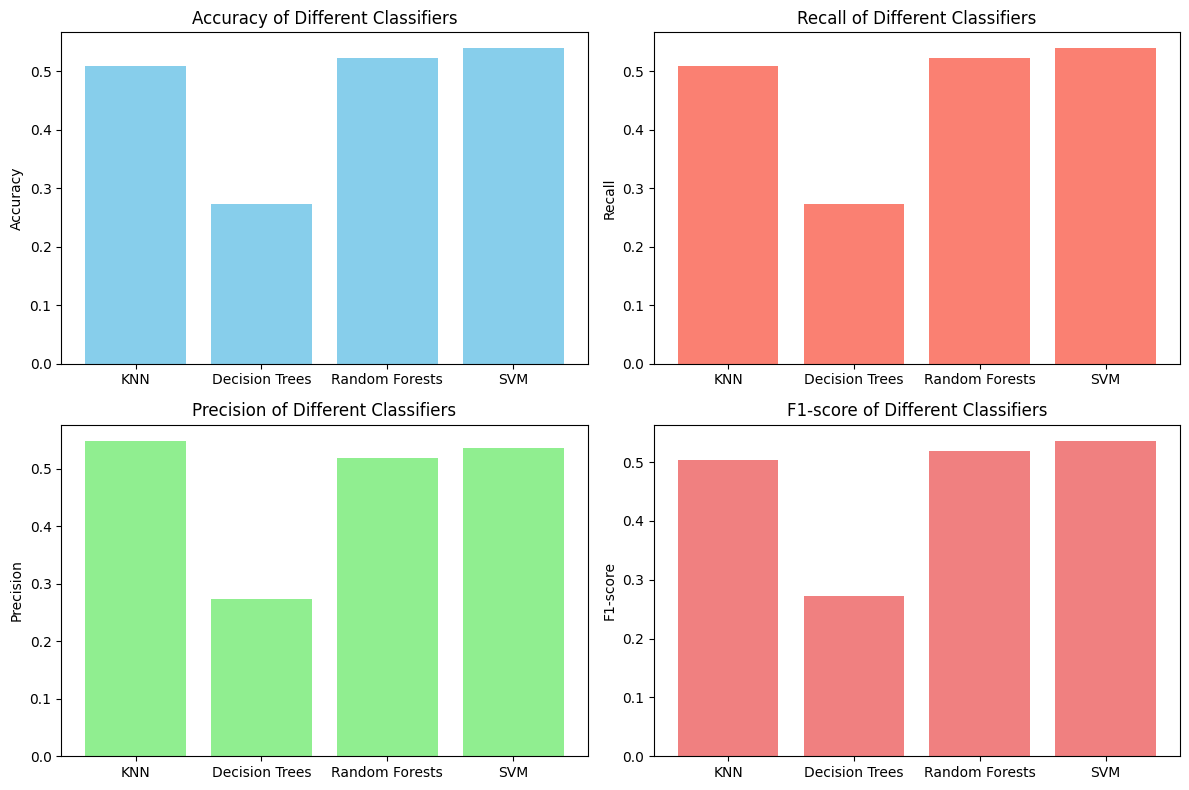

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

true_labels = y_test

predictions = {
    'KNN': knn_test_predictions,
    'Decision Trees': dt_test_predictions,
    'Random Forests': rf_test_predictions,
    'SVM': svm_test_predictions
}

accuracy_values = []
recall_values = []
precision_values = []
f1_values = []

for clf, pred in predictions.items():
    accuracy = accuracy_score(true_labels, pred)
    recall = recall_score(true_labels, pred, average='weighted')
    precision = precision_score(true_labels, pred, average='weighted')
    f1 = f1_score(true_labels, pred, average='weighted')

    accuracy_values.append(accuracy)
    recall_values.append(recall)
    precision_values.append(precision)
    f1_values.append(f1)

classifiers = ['KNN', 'Decision Trees', 'Random Forests', 'SVM']

# Plotting the bar plots
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.bar(classifiers, accuracy_values, color='skyblue')
plt.title('Accuracy of Different Classifiers')
plt.ylabel('Accuracy')

# Recall plot
plt.subplot(2, 2, 2)
plt.bar(classifiers, recall_values, color='salmon')
plt.title('Recall of Different Classifiers')
plt.ylabel('Recall')

# Precision plot
plt.subplot(2, 2, 3)
plt.bar(classifiers, precision_values, color='lightgreen')
plt.title('Precision of Different Classifiers')
plt.ylabel('Precision')

# F1-score plot
plt.subplot(2, 2, 4)
plt.bar(classifiers, f1_values, color='lightcoral')
plt.title('F1-score of Different Classifiers')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd


metrics = {
    'Classifier': classifiers,
    'Accuracy': accuracy_values,
    'Precision': precision_values,
    'Recall': recall_values,
    'F1-score': f1_values
}

metrics_df = pd.DataFrame(metrics)

metrics_df.set_index('Classifier', inplace=True)

print(metrics_df)

                Accuracy  Precision  Recall  F1-score
Classifier                                           
KNN               0.5086   0.549073  0.5086  0.503911
Decision Trees    0.2730   0.272845  0.2730  0.272834
Random Forests    0.5231   0.519191  0.5231  0.518340
SVM               0.5392   0.536515  0.5392  0.536377


# Saving the models

In [ ]:
with open('knn_classifier_hog.pkl', 'wb') as file:
    pickle.dump(knn_classifier, file)

In [ ]:
with open('dt_classifier_hog.pkl', 'wb') as file:
    pickle.dump(dt_classifier, file)

In [ ]:
with open('rf_classifier_hog.pkl', 'wb') as file:
    pickle.dump(rf_classifier, file)

In [17]:
with open('svm_classifier_hog.pkl', 'wb') as file:
    pickle.dump(svm_classifier, file)